# Merge the country sheet and Zomato file to get the country code


In [5]:
import pandas as pd
zomato_df = pd.read_csv(r"C:\Users\shish\Desktop\zomato.csv", encoding='latin1')
country_df = pd.read_excel(r"C:\Users\shish\Desktop\Country-Code.xlsx")
merged_df = pd.merge(zomato_df, country_df, on='Country Code', how='left')
print(merged_df.head())
merged_df.to_csv(r"C:\Users\shish\Desktop\merged_zomato.csv", index=False)


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Get the Top rated restaurants in each city in India (On the basis of rating and votes).

In [6]:
india_df = merged_df[merged_df['Country'] == 'India']
sorted_df = india_df.sort_values(by=['City', 'Aggregate rating', 'Votes'], ascending=[True, False, False])
top_restaurants = sorted_df.drop_duplicates(subset='City', keep='first')
from tabulate import tabulate
print(tabulate(top_restaurants[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']], headers='keys', tablefmt='grid'))


+------+-----------------------------------+--------------+--------------------+---------+
|      | Restaurant Name                   | City         |   Aggregate rating |   Votes |
+======+===================================+==============+====================+=========+
|  637 | Sheroes Hangout                   | Agra         |                4.9 |      77 |
+------+-----------------------------------+--------------+--------------------+---------+
|  653 | Cryo Lab                          | Ahmedabad    |                4.6 |     166 |
+------+-----------------------------------+--------------+--------------------+---------+
|  680 | Eat On                            | Allahabad    |                3.7 |     105 |
+------+-----------------------------------+--------------+--------------------+---------+
|  702 | Kesar Da Dhabha                   | Amritsar     |                4.1 |     878 |
+------+-----------------------------------+--------------+--------------------+---------+

# Finding out relationship between the rating and votes.

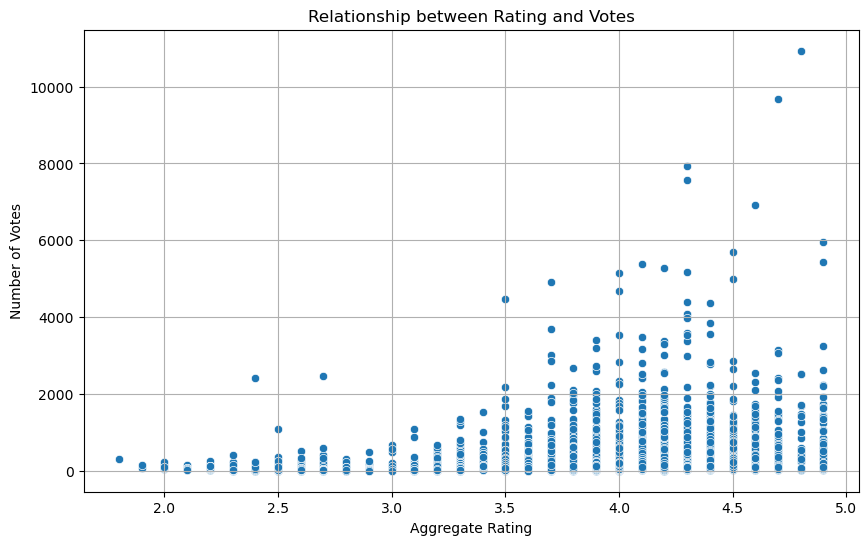


Correlation between Rating and Votes: 0.41


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_df = merged_df[(merged_df['Aggregate rating'] > 0) & (merged_df['Votes'] > 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Aggregate rating', y='Votes')
plt.title('Relationship between Rating and Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()
correlation = filtered_df['Aggregate rating'].corr(filtered_df['Votes'])
print(f"\nCorrelation between Rating and Votes: {correlation:.2f}")


# No of Restaurants in each country

In [8]:
restaurant_counts = merged_df['Country'].value_counts().reset_index()
restaurant_counts.columns = ['Country', 'Number of Restaurants']
from tabulate import tabulate
print(tabulate(restaurant_counts, headers='keys', tablefmt='grid'))


+----+----------------+-------------------------+
|    | Country        |   Number of Restaurants |
+====+================+=========================+
|  0 | India          |                    8652 |
+----+----------------+-------------------------+
|  1 | United States  |                     434 |
+----+----------------+-------------------------+
|  2 | United Kingdom |                      80 |
+----+----------------+-------------------------+
|  3 | Brazil         |                      60 |
+----+----------------+-------------------------+
|  4 | UAE            |                      60 |
+----+----------------+-------------------------+
|  5 | South Africa   |                      60 |
+----+----------------+-------------------------+
|  6 | New Zealand    |                      40 |
+----+----------------+-------------------------+
|  7 | Turkey         |                      34 |
+----+----------------+-------------------------+
|  8 | Australia      |                      24 |


# Top 5 restaurants with online delivery


In [9]:
online_delivery_df = merged_df[merged_df['Has Online delivery'] == 'Yes']
top_online_delivery = online_delivery_df.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])
top_5_online = top_online_delivery.head(5)
from tabulate import tabulate
print(tabulate(top_5_online[['Restaurant Name', 'City', 'Aggregate rating', 'Votes', 'Has Online delivery']], headers='keys', tablefmt='grid'))


+------+-------------------------------+------------+--------------------+---------+-----------------------+
|      | Restaurant Name               | City       |   Aggregate rating |   Votes | Has Online delivery   |
+======+===============================+============+====================+=========+=======================+
| 3013 | Naturals Ice Cream            | New Delhi  |                4.9 |    2620 | Yes                   |
+------+-------------------------------+------------+--------------------+---------+-----------------------+
| 2350 | Zolocrust - Hotel Clarks Amer | Jaipur     |                4.9 |     322 | Yes                   |
+------+-------------------------------+------------+--------------------+---------+-----------------------+
| 1381 | Caterspoint                   | Gurgaon    |                4.9 |     223 | Yes                   |
+------+-------------------------------+------------+--------------------+---------+-----------------------+
|  841 | CakeBee   

# Top Cuisines in each region 

In [17]:
import pandas as pd

# Load the datasets
zomato_df = pd.read_csv("C:/Users/shish/Desktop/zomato.csv", encoding='latin-1')
country_df = pd.read_excel("C:/Users/shish/Desktop/Country-Code.xlsx")

# Merge the datasets
df_merged = pd.merge(zomato_df, country_df, on='Country Code', how='left')

# Define function to get top cuisines by country
def top_cuisines_by_country(df):
    top_cuisines = {}
    
    for country in df['Country'].unique():
        country_df = df[df['Country'] == country]
        
        if not country_df.empty:
            cuisines_series = country_df['Cuisines'].dropna()
            cuisines = cuisines_series.str.split(', ').explode()
            top_cuisines[country] = cuisines.value_counts().head(5).index.tolist()
    
    return top_cuisines

# Call the function
country_top_cuisines = top_cuisines_by_country(df_merged)

# Display the result
for country, cuisines in country_top_cuisines.items():
    print(f"Top cuisines in {country}: {', '.join(cuisines)}")


Top cuisines in Phillipines: Filipino, Asian, Japanese, American, Italian
Top cuisines in Brazil: Brazilian, Bar Food, Italian, Grill, Pizza
Top cuisines in United States: American, Seafood, Sandwich, Burger, Pizza
Top cuisines in Australia: Modern Australian, Coffee and Tea, Cafe, Australian, Breakfast
Top cuisines in Canada: Japanese, Sushi, Chinese, Canadian, Italian
Top cuisines in Singapore: American, Singaporean, French, Chinese, Cafe
Top cuisines in UAE: Indian, American, North Indian, Chinese, Burger
Top cuisines in India: North Indian, Chinese, Fast Food, Mughlai, Bakery
Top cuisines in Indonesia: Western, Indonesian, Cafe, Japanese, Sunda
Top cuisines in New Zealand: Cafe, European, Kiwi, Desserts, American
Top cuisines in United Kingdom: Indian, British, Cafe, American, Italian
Top cuisines in Qatar: Indian, Chinese, American, International, Bakery
Top cuisines in South Africa: Burger, Grill, Cafe, Sushi, Seafood
Top cuisines in Sri Lanka: American, Sri Lankan, Cafe, Dessert

# Aggregate rating of all the restaurants in each city in a country 

In [18]:
city_country_aggregate_rating = df_merged.groupby(['Country', 'City'])['Aggregate rating'].mean()

print("Aggregate rating of restaurants in each city by country:")
city_country_aggregate_rating

Aggregate rating of restaurants in each city by country:


Country        City          
Australia      Armidale          3.500
               Balingup          3.200
               Beechworth        4.600
               Dicky Beach       3.600
               East Ballina      4.100
                                 ...  
United States  Valdosta          3.715
               Vernonia          4.300
               Waterloo          3.650
               Weirton           3.900
               Winchester Bay    3.200
Name: Aggregate rating, Length: 141, dtype: float64

# DOES RATING INFLUENCES THE COST OF RESTAURANTS 

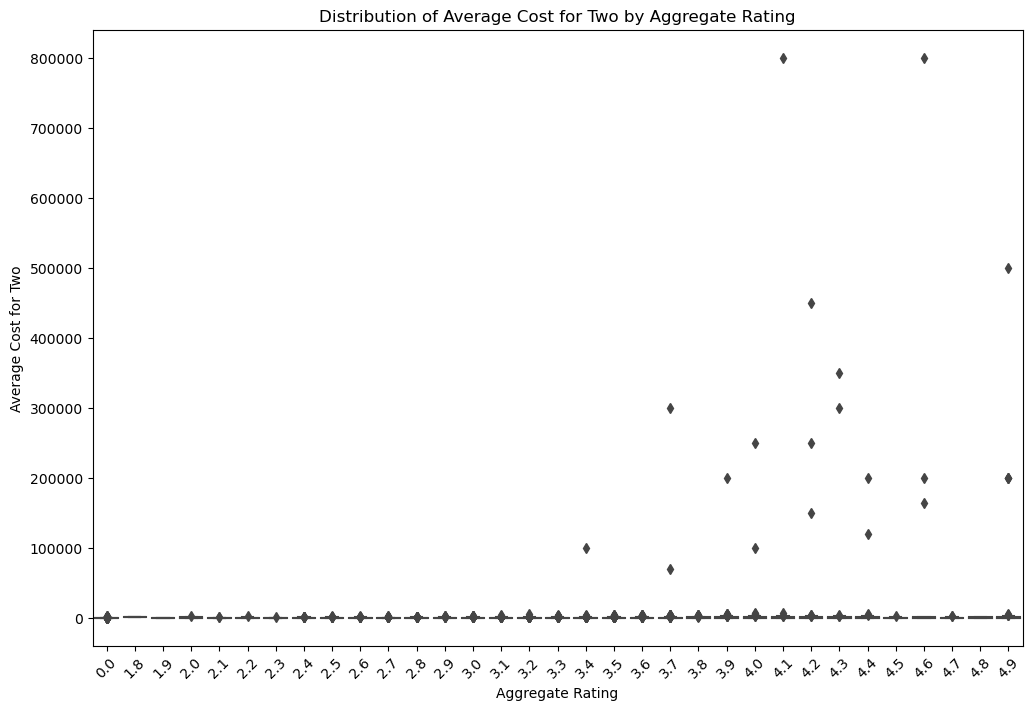

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df_merged['Aggregate rating'] = df_merged['Aggregate rating'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Aggregate rating', y='Average Cost for two', data=df_merged)
plt.title('Distribution of Average Cost for Two by Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45)
plt.show()

# Top Percentage cover of restaurants in a city (draw a pie chart )

Percentage of restaurants in New Delhi: 57.30%


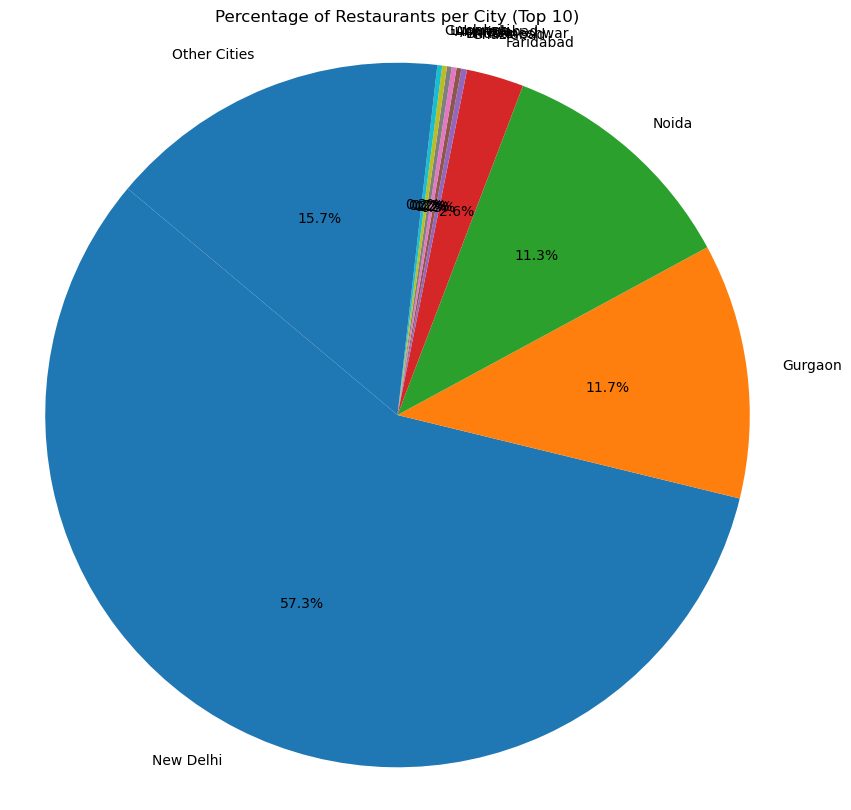

In [20]:
import matplotlib.pyplot as plt
# Function to get percentage cover of restaurants in a city
def city_restaurant_percentage(df, city_name):
    city_df = df[df['City'] == city_name]
    if city_df.empty:
        print(f"No restaurants found in {city_name}")
        return

    # Calculate the percentage of restaurants in this city compared to the total
    total_restaurants = len(df)
    city_restaurants_count = len(city_df)
    percentage = (city_restaurants_count / total_restaurants) * 100

    print(f"Percentage of restaurants in {city_name}: {percentage:.2f}%")

    # To draw a pie chart of top cities' restaurant percentages,

    top_n = 10 # You can adjust this number
    city_counts = df['City'].value_counts()
    top_cities = city_counts.head(top_n)
    other_cities_count = city_counts[top_n:].sum()

    # Prepare data for the pie chart
    labels = top_cities.index.tolist()
    sizes = top_cities.values.tolist()

    if other_cities_count > 0:
        labels.append('Other Cities')
        sizes.append(other_cities_count)

    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Percentage of Restaurants per City (Top 10)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
city_restaurant_percentage(df_merged, 'New Delhi')

# Top cuisines in Indian Restaurants 

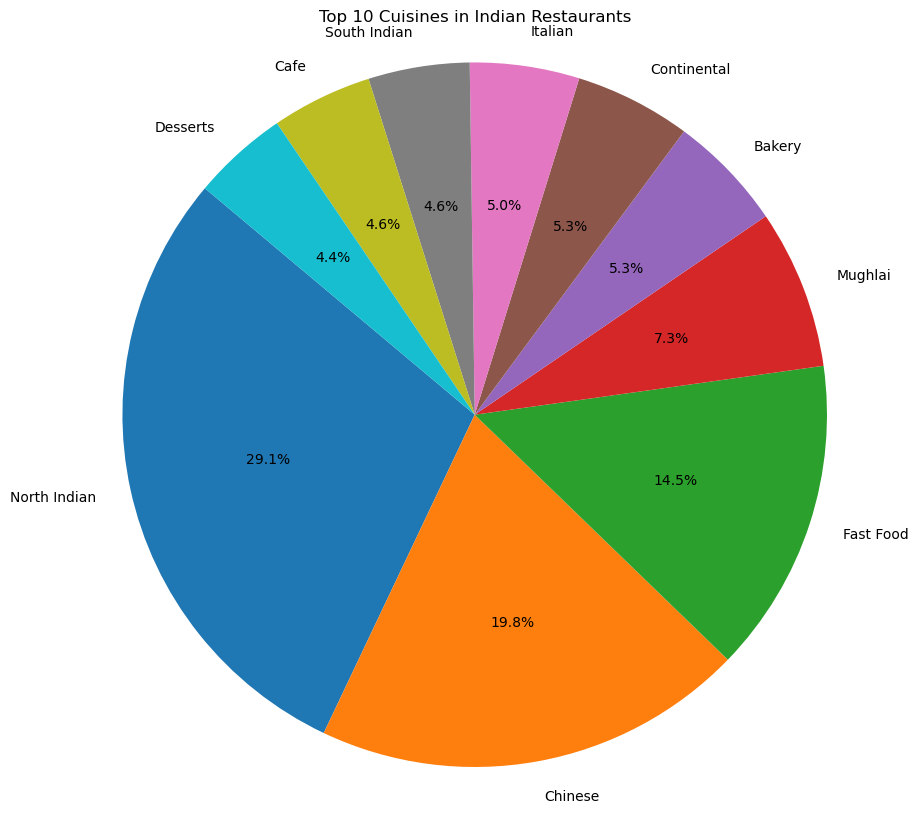

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
zomato_df = pd.read_csv("C:/Users/shish/Desktop/zomato.csv", encoding='latin-1')
country_df = pd.read_excel("C:/Users/shish/Desktop/Country-Code.xlsx")

# Merge
df_merged = pd.merge(zomato_df, country_df, on='Country Code', how='left')

# Filter for Indian restaurants
indiaRes = df_merged[df_merged['Country'] == 'India']

# Handle missing cuisines
indiaRes = indiaRes[indiaRes['Cuisines'].notna()]

# Get top 10 cuisines
india_cuisines = indiaRes['Cuisines'].str.split(', ').explode().value_counts().head(10)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(india_cuisines, labels=india_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Cuisines in Indian Restaurants')
plt.axis('equal')
plt.show()
